In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from positionCorrection import positionCorrection as correct
from mpl_toolkits.mplot3d import Axes3D
import math

In [6]:
df = pd.read_csv('../data/dwarfData.csv')
df[0:10]

,First Subhalo ID,Group Mass,First Subhalo Mass,Second Subhalo Mass,First Subhalo x,First Subhalo y,First Subhalo z,Second Subhalo x,Second Subhalo y,Second Subhalo z,First Subhalo v_x,First Subhalo v_y,First Subhalo v_z,Second Subhalo v_x,Second Subhalo v_y,Second Subhalo v_z
0,719294,8.414271,8.861006,6.656660,72754.820312,22228.687500,13827.399414,72711.757812,22095.035156,13735.984375,279.117737,537.701294,436.091614,218.740158,472.279297,565.028076
1,724828,5.336759,4.098083,3.990536,70139.476562,8446.573242,35617.343750,70049.531250,8327.910156,35692.429688,9.868170,-40.660187,-101.269394,-88.274109,152.874252,-114.165298
2,725390,8.931701,9.974084,5.169798,49115.554688,10174.749023,1930.850708,49123.136719,10328.787109,1968.984131,-122.396690,-57.371891,109.919937,-106.038902,-60.544899,47.550117
3,725756,9.683029,8.706830,7.083841,16337.500000,20370.634766,30459.595703,16296.844727,20500.845703,30603.960938,-57.363388,58.076580,-91.628685,-3.528510,39.368271,-134.715912
4,730920,8.870783,7.888566,6.852953,5001.358398,31001.955078,45811.164062,5083.579590,30984.912109,45970.269531,326.874146,138.533890,191.575607,426.653748,162.509583,37.427456
5,738480,9.687542,8.069818,7.180108,21594.083984,73031.601562,59579.550781,21627.029297,73132.953125,59726.082031,186.727982,-43.308735,79.348846,152.229645,-39.634544,28.508429
6,739624,4.683954,4.115381,3.482130,11111.249023,50896.070312,49224.277344,11211.207031,50943.304688,49159.039062,95.728516,-571.000244,329.381287,-43.787285,-229.168106,674.305725
7,741176,9.500274,9.820660,6.983815,29643.000000,27573.085938,25011.134766,29637.751953,27547.285156,25166.625000,-124.506973,-104.163261,204.863739,-186.033737,-88.084648,179.188843
8,741351,8.759475,6.237751,4.028140,61945.929688,2004.279785,39727.882812,62034.214844,2158.351807,39785.035156,-408.781769,127.821732,-20.710840,-384.763458,86.498390,-14.111828
9,741752,9.863528,7.881046,2.744340,29608.644531,58924.910156,60105.894531,29671.691406,58834.839844,60035.132812,-93.227867,152.782806,-264.667877,-598.307373,171.364273,-258.973175


In [5]:
subhalo1Mass  = df['First Subhalo Mass']
subhalo2Mass  = df['Second Subhalo Mass']
subhalo1Pos   = np.column_stack([df['First Subhalo x'],df['First Subhalo y'],df['First Subhalo z']])
subhalo2Pos   = np.column_stack([df['Second Subhalo x'],df['Second Subhalo y'],df['Second Subhalo z']])
subhalo1Vel   = np.column_stack([df['First Subhalo v_x'],df['First Subhalo v_y'],df['First Subhalo v_z']])
subhalo2Vel   = np.column_stack([df['Second Subhalo v_x'],df['Second Subhalo v_y'],df['Second Subhalo v_z']])
relativeVelocities = np.array([np.linalg.norm(i) for i in subhalo1Vel-subhalo2Vel])
separations = np.array([np.linalg.norm(i) for i in subhalo1Pos-subhalo2Pos])

len(subhalo1Mass)

901233

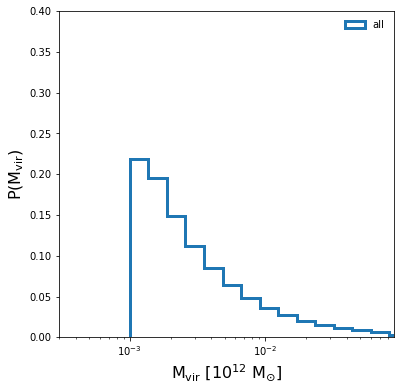

In [4]:
plt.figure(figsize=(6,6))
ax = plt.subplot(111)
min, max = np.min(subhalo1Mass/100), np.max(subhalo1Mass/100)

weights = np.ones_like(subhalo1Mass)/len(subhalo1Mass)
plt.hist(subhalo1Mass/100, bins = 10**np.linspace(np.log10(min), np.log10(max), 16), weights=weights, histtype='step', label='all',  lw=3) 
plt.xscale("log")
plt.xlabel(r'$\rm M_{vir}$ [10$^{12}$ M$\rm_{\odot}$]', fontsize=16)
plt.ylabel(r'P($\rm M_{vir}$)', fontsize=16)
plt.xlim(0.0003, 0.088)
plt.ylim(0.0, .4)
#labels = ['0.7', '1','1.5', '2', '3']
#ticks = [0.7, 1, 1.5, 2, 3]
#ax.set_xticks(ticks)
#ax.set_xticklabels(labels)
plt.legend(loc='upper right', frameon=False)
plt.show()

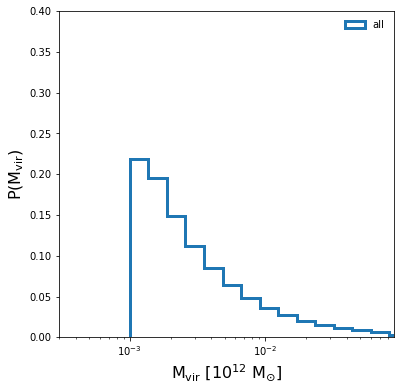

In [5]:
plt.figure(figsize=(6,6))
ax = plt.subplot(111)
min, max = np.min(subhalo1Mass/100), np.max(subhalo1Mass/100)

weights = np.ones_like(subhalo1Mass)/len(subhalo1Mass)
plt.hist(subhalo1Mass/100, bins = 10**np.linspace(np.log10(min), np.log10(max), 16), weights=weights, histtype='step', label='all',  lw=3) 
plt.xscale("log")
plt.xlabel(r'$\rm M_{vir}$ [10$^{12}$ M$\rm_{\odot}$]', fontsize=16)
plt.ylabel(r'P($\rm M_{vir}$)', fontsize=16)
plt.xlim(0.0003, 0.088)
plt.ylim(0.0, .4)
#labels = ['0.7', '1','1.5', '2', '3']
#ticks = [0.7, 1, 1.5, 2, 3]
#ax.set_xticks(ticks)
#ax.set_xticklabels(labels)
plt.legend(loc='upper right', frameon=False)
plt.show()

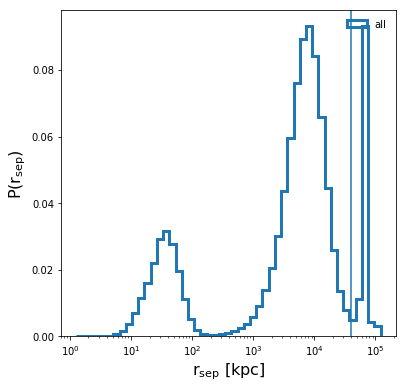

In [6]:
correctedSeparations = np.array([np.linalg.norm(i) for i in np.array(correct(subhalo1Pos,subhalo2Pos))])
#print(correctedSeparations[0:10])

plt.figure(figsize=(6,6))
ax = plt.subplot(111)
min, max = np.min(separations), np.max(separations)

weights = np.ones_like(separations)/len(separations)
plt.hist(separations, bins = 10**np.linspace(np.log10(min), np.log10(max), 50), weights=weights, histtype='step', label='all',  lw=3) 
plt.xscale("log")
plt.axvline(40000)
plt.xlabel(r'$\rm r_{sep}$ [kpc]', fontsize=16)
plt.ylabel(r'P($\rm r_{sep}$)', fontsize=16)
plt.legend(loc='upper right', frameon=False)
plt.show()


#print(correctedSeparations[np.where(separations>= 40000)])


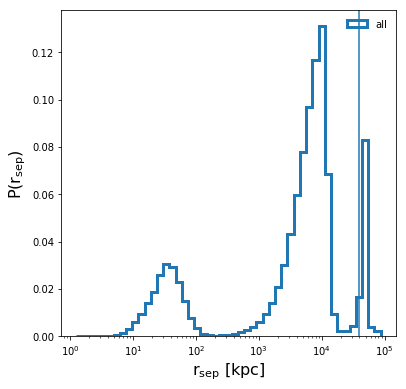

In [7]:
correctedSeparations = np.array([np.linalg.norm(i) for i in np.array(correct(subhalo1Pos,subhalo2Pos))])
#print(correctedSeparations[0:10])

plt.figure(figsize=(6,6))
ax = plt.subplot(111)
min, max = np.min(correctedSeparations), np.max(correctedSeparations)

weights = np.ones_like(correctedSeparations)/len(correctedSeparations)
plt.hist(correctedSeparations, bins = 10**np.linspace(np.log10(min), np.log10(max), 50), weights=weights, histtype='step', label='all',  lw=3) 
plt.xscale("log")
plt.axvline(40000)
plt.xlabel(r'$\rm r_{sep}$ [kpc]', fontsize=16)
plt.ylabel(r'P($\rm r_{sep}$)', fontsize=16)
plt.legend(loc='upper right', frameon=False)
plt.show()


#print(correctedSeparations[np.where(separations>= 40000)])


make LMC mass group cuts (AM) and then impose subhalo mass limit